# Undestanding the Kugelman et al 2019 Code
## Semantic Model
The code in https://github.com/jakugel/oct-choroid-seg will be analyzed and modified to read in area segmentations instead of boundaries, and to decide whether to use hdf5 format for the images or read the images directly from a directory.

The boundaries are the ILM, RPE and CSI. For the semantic segmentation these 4 regions (areas) are needed:

1. Vitreous (top of the image to ILM)
2. Retinal (ILM to RPE)
3. Choroid (RPE to CHR)
4. Sclera (CHR to bottom of the image)

## Loading Area Labels
The semantic model requires image area segmentations, but the functions `load_training_data` and `load_validation_data` in `train_script_semantic_general.py` are written for segmentation files that contain boundaries. 

These boundaries are then converted to areas or “masks” in function `create_all_area_masks(images, segs)`.

If the input training labels are already area labels, the function `create_all_area_masks` does not need to convert boundaries to areas. It should be enough to set `mask = segs`.

## Dependencies
See [oct-choroid-seg github Readme](https://github.com/jakugel/oct-choroid-seg)


# BioTeam Code Modifications
The BioTeam code can be found in the [BioTeam github](https://github.com/bioteam/ML-Image-Segmentation)
## Dependencies
environment.yml from [BioTeam's github](https://github.com/bioteam/ML-Image-Segmentation/tree/main/oct-choroid-seg)

## Processing images
`create_all_area_masks(images, segs)` calls `create_area_mask(image, segs)` for all training or evaluation image and label pairs. In our dataset, images are TIF files, and segs are PNG files.

The `images, segs` parameters of `create_all_area_masks` are HDF5 datasets, not regular arrays. The return value is an np.array. 

We modify `create_area_mask(image, segs)` to set `mask = segs` **if the image and segs dimensions and dtype are the same and dtype is uint8**.

<div class="alert-danger">
Warning: Matplolib reads png files with function png.read_png_float by default which makes it seem integer png files are of type float32. Use PIL instead. 
</div>

<br>The code below uses PIL to inspect the images:

uint8
(616, 1592, 3)


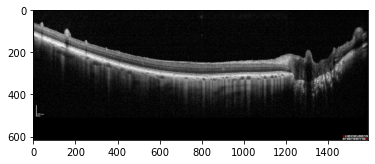

uint8
(616, 1592, 3)


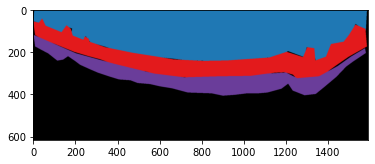

In [12]:
import numpy as np
from matplotlib import image as mplimage
from matplotlib import pyplot
from PIL import Image

def create_area_mask(image, segs):
    mk = np.array([])    
    #verify image & segs have the same integer dimensions
    if image.shape == segs.shape and segs.dtype == image.dtype and np.issubdtype(np.uint8,segs.dtype) :
        mk = segs
    
    return mk

# load image as pixel array
image = np.array(Image.open('000.tif'))

# Verify image is correct: summarize shape of the pixel array
print(image.dtype)
print(image.shape)

# Verify image is correct: display the array of pixels as an image

pyplot.imshow(image)
pyplot.show()

# load image as pixel array
# Be aware that matplotlib uses by default png.read_png_float for png images, 
# use PIL instead:
segs = np.array(Image.open('000.png'))



mask = create_area_mask(image, segs)
if mask.all():
  print("Mask is empty")
else:
    # Verify mask is correct: summarize shape of the pixel array
    print(mask.dtype)
    print(mask.shape)

    # Verify mask is correct: display the array of pixels as an image

    pyplot.imshow(mask)
    pyplot.show()





## Directory structure and HDF5 structure
Kugelman et al 2019 `example_data.hdf5` file can be read with `hdf52images.py` and has this structure: 
```
test_images
Dims: (3, 1536, 496, 1)
test_segs
Dims: (3, 3, 1536)
train_images
Dims: (3, 1536, 496, 1)
train_segs
Dims: (3, 3, 1536)
val_images
Dims: (3, 1536, 496, 1)
val_segs
Dims: (3, 3, 1536)
```

In [BioTeam's github](https://github.com/bioteam/ML-Image-Segmentation), images and segmentations are saved using the same format.

